In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics 
from itertools import islice 

# Euclidean Distance
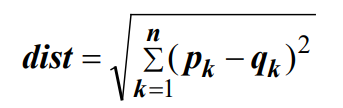

In [3]:
#For Similiarity and Dissimiliarity using Euclidean Distance
p = np.array([0.4,0.53])
q = np.array([0.22,0.38])

def eu_dist(p, q):
    return np.sqrt(np.sum(np.square(p-q)))

print(eu_dist(p,q))

0.23430749027719966


# Minkowski Distance
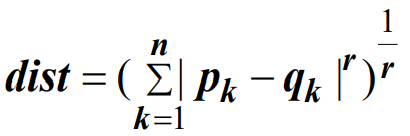

In [3]:
#For Similiarity and Dissimiliarity using Minkowski Distance

#r = 1 (L1 Norm)
#r = 2 (L2 Norm)
#r = infinite (Lmax Norm)

r = 1
p = np.array([1,0,0,0,0,0,1,0,0,0])
q = np.array([1,0,0,0,1,1,1,0,0,0])

def minko_dist(p, q, r):
    return np.power(np.sum(np.power(np.abs(p-q),r)),(1/r))

print(minko_dist(p,q,r))

2.0


In [2]:
#DEFINITION OF FUNCTION
def similiarity(p,q,test):
    M01, M10, M11, M00 = 0,0,0,0
    if len(p) == len(q):
        for i in range(len(p)):
            if p[i] == q[i] and p[i] == 0:
                M00+=1
            elif p[i] == q[i] and p[i] == 1:
                M11+=1
            elif p[i] != q[i] and p[i] == 0:
                M01+=1
            else:
                M10+=1
        
        if test.lower() == "smc":
            return (M11+M00)/(M01+M10+M11+M00)
        elif test.lower() == "jac":
            return M11/(M01+M10+M11)
        else:
            return "Wrong Test Name"
    else:
        return "P and Q not same length"

# Simple Matching Coefficient
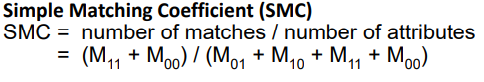

In [5]:
#RUN TEST HERE
p = np.array([0,1,0,1,0])
q = np.array([0,1,0,0,0])
test = "smc"

print(similiarity(p,q,test))

0.8


# Jaccard Coeffiecient
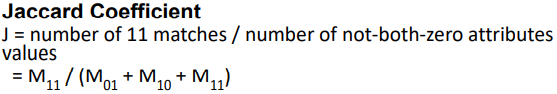

In [5]:
#RUN TEST HERE
p = np.array([1,0,0,1,1,0,0])
q = np.array([0,0,0,1,1,1,0])
test = "jac"

print(similiarity(p,q,test))

0.5


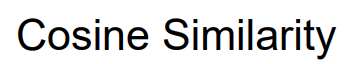

In [12]:
#DEFINITION OF FUNCTION
def cos_similiarity(d1,d2):
    if len(d1) == len(d1):
        return np.dot(d1,d2)/np.sqrt(np.sum(np.square(d1))*np.sum(np.square(d2)))
    else:
        return "P and Q not same length"

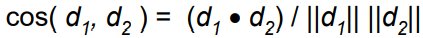

In [18]:
#RUN TEST HERE
d1 = np.array([2/3,0,0,5/3,-4/3,0,0])
d2 = np.array([0,0,0,-5/3,1/3,4/3,0])

print(cos_similiarity(d1,d2))

-0.6670633740309424


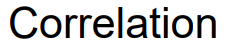

### DRAWBACK OF CORRELATION
### When Y=X^2, corr = 0. Which is not correct

In [106]:
x = np.array([4,3.5,3,3])
y = np.array([3.1,3.9,4,4])
z = np.array([0.9,1.1,1.2,1.2])

ds = pd.DataFrame()
ds['x'] = x.tolist()
ds['y'] = y.tolist()
ds['z'] = z.tolist()
ds.describe()

,x,y,z
count,4.000000,4.00000,4.000000
mean,3.375000,3.75000,1.100000
std,0.478714,0.43589,0.141421
min,3.000000,3.10000,0.900000
25%,3.000000,3.70000,1.050000
50%,3.250000,3.95000,1.150000
75%,3.625000,4.00000,1.200000
max,4.000000,4.00000,1.200000


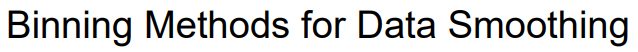

In [10]:
def binning(data, nbin=3, method="ef"):
    bin_val = []
    result = []
    
    data = np.sort(data)
    
    depth = len(data)/nbin
    if depth-np.floor(depth) == 0:
        if method == "ef":
            for i in range(len(data)):
                if (i+1)%depth == 0:
                    bin_val.append(data[i])
                    result.append(bin_val)
                    bin_val = []
                else:
                    bin_val.append(data[i])

        elif method == "mean":
            for i in range(len(data)):
                if (i+1)%depth == 0:
                    bin_val.append(data[i])
                    result.append([np.round(np.mean(bin_val))]*int(depth))
                    bin_val = []
                else:
                    bin_val.append(data[i])
                    
        elif method == "boundary":
            return "Do Yourself"
                      
    else:
        return "Unable to Bin Data Equally"
        
    return result

In [11]:
#RUN TEST HERE
data = np.array([5,10,11,13,15,35,50,55,72,92,204,215])
nbin=3

#For Equal-Frequency/Depth Bin
output = binning(data, nbin=3, method="ef")
print(output)

[[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]


### MEAN OF OUTPUT

In [12]:
#IF NEW VALUE
output = np.array([[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]])

def mean(output):
    result = []
    for i in output:
        result.append([int(np.round(np.mean(i)))]*len(i))
    return result

print(mean(output))

[[10, 10, 10, 10], [39, 39, 39, 39], [146, 146, 146, 146]]


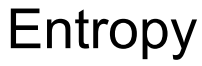

In [13]:
def entropy(pdata):
    p = pdata.tolist()
    if 0 in p:
        p.remove(0)
    p = np.array(p)
    
    return -np.sum(p*np.log2(p))

#RUN TEST HERE
p = np.array([0.166,0.166,0.166,0.166,0.166,0.166])

print(entropy(p))

2.5803818739019015


# Joint Entropy

In [14]:
def joint_entropy(p1,p2,p3):
    p1, p2, p3 = p1.tolist(), p2.tolist(), p3.tolist()
    
    if 0 in p1:
        p1.remove(0)
    if 0 in p2:
        p2.remove(0)
    if 0 in p3:
        p3.remove(0)
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    
    result = entropy(p1)+entropy(p2)-entropy(p3)
    return result

#RUN TEST HERE
p1 = np.array([0.45,0.55])
p2 = np.array([0.35,0.50,0.15])
p3 = np.array([0.05,0.3,0.1,0.3,0.2,0.05])

print(joint_entropy(p1,p2,p3))

0.16246930914848612


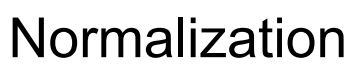

In [15]:
def Normalization(input_val, min_val, max_val, new_max, new_min):
    return ((input_val-min_val)/(max_val-min_val))*(new_max-new_min)+new_min, new_max, new_min

min_val = 12000
max_val = 98000
new_max = 1
new_min = 0
input_val = 73000


result, new_max, new_min= Normalization(input_val, min_val, max_val, new_max, new_min)
print(f"Result = {result}, new_max = {new_max}, new_min = {new_min}")

Result = 0.7093023255813954, new_max = 1, new_min = 0


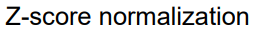

In [16]:
def Znorm(val, mean, sd):
    return (val-mean)/sd

mean = 54000
sd = 16000
val = 73000

result = Znorm(val, mean, sd)
print(result)

1.1875


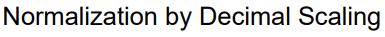

In [17]:
min_val = -191
max_val = 191

def DSNorm(min_val, max_val):
    count=0
    for i in str(val):
        count+=1
    
    return min_val/np.power(10, count), max_val/np.power(10, count)

new_min, new_max = DSNorm(min_val, max_val)
print(f"new_min = {new_min}, new_max = {new_max}")

new_min = -0.00191, new_max = 0.00191
